### 1: Download and Install Python and SciPy Ecosystem


In [1]:
#Let us Check the versions of everything we are going to need using the code below:

#import sys
#!{sys.executable} -m pip install scipy

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import seaborn as sns 
print('seaborn: {}'.format(sns.__version__))

import matplotlib.pyplot as plt
%matplotlib inline

Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1
seaborn: 0.8.1


### 2: Get Around In Python, NumPy, Matplotlib and Pandas

You need to be able to read and write basic Python scripts. As a developer you can pick-up new
programming languages pretty quickly. Python is case sensitive, uses hash (#) for comments
and uses white space to indicate code blocks (white space matters). Todays task is to practice
the basic syntax of the Python programming language and important SciPy data structures in
the Python interactive environment.
1. Practice assignment, working with lists and 
ow control in Python.
2. Practice working with NumPy arrays.
3. Practice creating simple plots in Matplotlib.
4. Practice working with Pandas Series and DataFrame.

In [2]:
#simple example of creating a Pandas DataFrame.

myarray = numpy.array([[1,2,3],[4,5,6]])
rownames=['a','b']
colnames=['one','two','three']
mydataframe=pandas.DataFrame(myarray,index=rownames,columns=colnames)
print(mydataframe)


   one  two  three
a    1    2      3
b    4    5      6


### 3: Load Data From CSV

Machine learning algorithms need data. You can load your own data from CSV les but when
you are getting started with machine learning in Python you should practice on standard
machine learning datasets. Your task for todays lesson are to get comfortable loading data into
Python and to nd and load standard machine learning datasets. There are many excellent
standard machine learning datasets in CSV format that you can download and practice with on
the UCI machine learning repository5.
 Practice loading CSV les into Python using the CSV.reader()6 function in the standard
library.
 Practice loading CSV les using NumPy and the numpy.loadtxt()7 function.
 Practice loading CSV les using Pandas and the pandas.read csv()8 function.

In [3]:
# Lets load the Pima Indians onset of diabetes dataset using Pandas directly
from pandas import read_csv
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv('./pima-indians-diabetes.data.csv', names=names)
print(data.shape)
print(data.head())

(768, 9)
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


### 4:Understand Data with Descriptive Statistics

In [4]:
# distribution of your data
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 5 :Understand Data with Visualization

In [5]:
#data types for each attribute
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

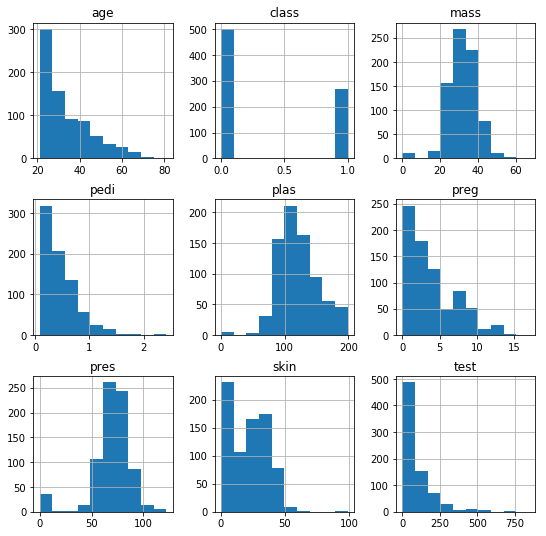

In [6]:
#histogram plot of data
data.hist(figsize=(9,9));

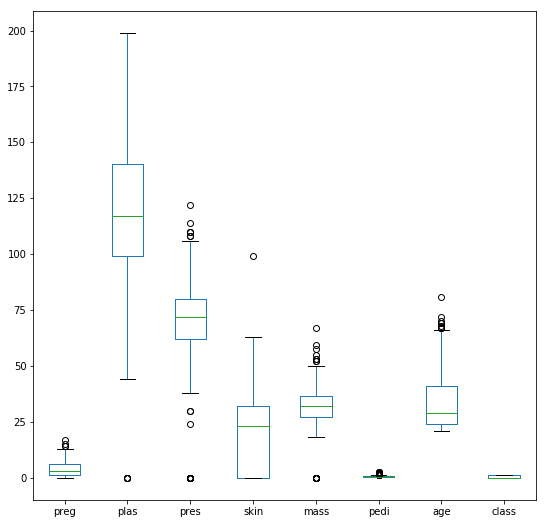

In [7]:
data.drop('test',inplace=False, axis=1).plot(kind='box', figsize=(9,9));

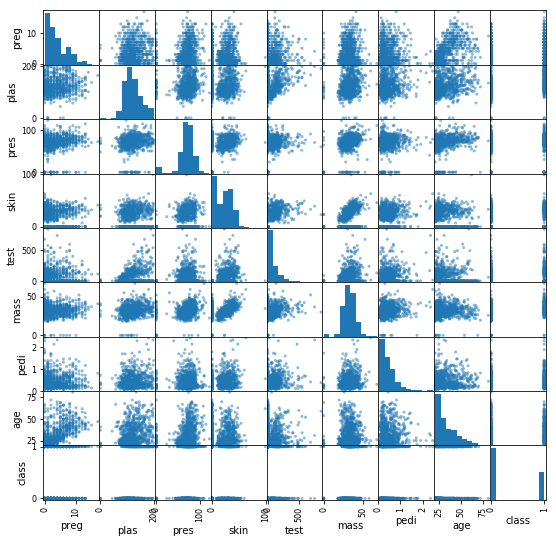

In [8]:
#Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(9,9));

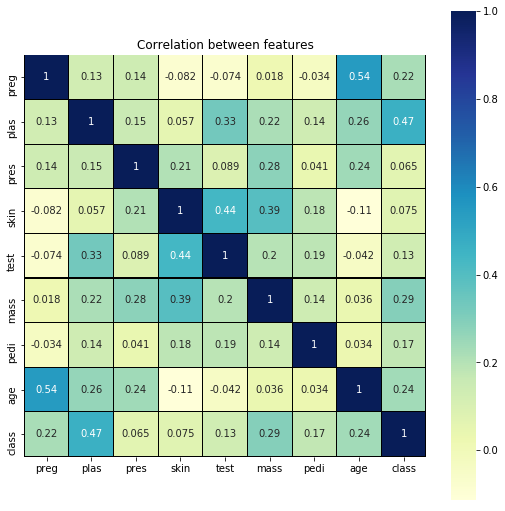

In [9]:
#e pairwise correlation between the variables
correlation = data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlation, vmax=1, linewidth=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')
plt.show()

### 6: Prepare For Modeling by Pre-Processing Data

.Standardize numerical data (e.g. mean of 0 and standard deviation of 1) using the scale and center options.

.Normalize numerical data (e.g. to a range of 0-1) using the range option.

.Explore more advanced feature engineering such as Binarizing.

In [10]:
#Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
array=data.values

#separate array into input and output components
X=array[:,0:8]
Y=array[:, 8]

#Fit and Transfrom the input
scaler = StandardScaler().fit(X)
rescaledX=scaler.transform(X)

#Summarize transformed data
numpy.set_printoptions(precision=3)

#chek top 5 values of resccaled x
print(rescaledX[0:5,:])


[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


### 7: Algorithm Evaluation With Resampling Methods

In [11]:
#Evaluate using cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X,Y, cv=kfold)

#Estimate the Accuracy of an Algorithm with k-fold Cross-Validation.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



Accuracy: 76.951% (4.841%)


### 8: Algorithm Evaluation Metrics

In [12]:
# Cross-Validation Classification LogLoss
scoring = 'neg_log_loss'
result2 = cross_val_score(model, X,Y, cv=kfold, scoring=scoring)

#Evaluate an Algorithm Using LogLoss.
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))


Logloss: 0.770 (0.048)


### 9: Spot-Check Algorithms
You cannot possibly know which algorithm will perform best on your data beforehand. You have to discover it using a process of trial and error. I call this spot-checking algorithms.

The scikit-
learn library provides an interface to many machine learning algorithms and tools to compare
the estimated accuracy of those algorithms. In this lesson you must practice spot-checking
different machine learning algorithms.
 Spot-check linear algorithms on a dataset (e.g. linear regression, logistic regression and
linear discriminate analysis).
 Spot-check some nonlinear algorithms on a dataset (e.g. KNN, SVM and CART).
 Spot-check some sophisticated ensemble algorithms on a dataset (e.g. random forest and
stochastic gradient boosting).
For example, the snippet below spot-checks the k-Nearest Neighbors algorithm on the Boston
House Price dataset.

In [29]:
#KNN regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

dataframe = read_csv('./Boston_Housing_Price_Dataset.csv', delim_whitespace=True, names=names)
array=dataframe.values
X1=array[:,0:13]
Y1=array[:,13]

#Spot-Check a Nonlinear Regression Algorithm.
kfold=KFold(n_splits=10, random_state=7)
model=KNeighborsRegressor()
scoring="neg_mean_squared_error"
results = cross_val_score(model,X1,Y1,cv=kfold,scoring=scoring)
print("mean: {}".format(results.mean()))
print("std: {}".format(results.std()))


mean: -107.28683898039215
std: 79.83952949703466


### 10: Model Comparison and Selection

Compare linear algorithms to each other on a dataset.
Compare nonlinear algorithms to each other on a dataset.
Create plots of the results comparing algorithms.

The example below compares Logistic Regression and Linear Discriminant Analysis to each
other on the Pima Indians onset of diabetes dataset

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# prepare models
comparingmodels=[]
comparingmodels.append(('LR',LogisticRegression()))
comparingmodels.append(('LDA', LinearDiscriminantAnalysis()))
P=array[:,0:8]
Q=array[:,8]

# evaluate each model in turn
resultset=[]
names=[]
scoring='accuracy'

#Evaluate and Compare Two Algorithms on a Dataset.
for name,model in comparingmodels:
    kfold=KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, P, Q, cv=kfold, scoring=scoring)
    resultset.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))



LR: 0.480039 (0.308771)
LDA: 0.351333 (0.288078)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


### 11: Improve Accuracy with Algorithm Tuning
Once you have found one or two algorithms that perform well on your dataset, you may want to
improve the performance of those models. One way to increase the performance of an algorithm
is to tune it's parameters to your specic dataset. The scikit-learn library provides two ways to
search for combinations of parameters for a machine learning algorithm:
 Tune the parameters of an algorithm using a grid search that you specify.
 Tune the parameters of an algorithm using a random search.

In [38]:
#The snippet below uses is anexample of using  a grid search for the Ridge Regression algorithm on the Pima Indians onset ofdiabetes dataset.

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
M=array[:,0:8]
N=array[:,8]

alphas=numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid=dict(alpha=alphas)

#Example of Algorithm Tuning with Grid Search.
model=Ridge()
grid=GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(M,N)
print(grid.best_score_)
print(grid.best_estimator_.alpha)



-20.217113580275342
1.0


### 12: Improve Accuracy with Ensemble Predictions

Another way that you can improve the performance of your models is to combine the predictions
from multiple models. Some models provide this capability built-in such as random forest for
bagging and stochastic gradient boosting for boosting. Another type of ensembling called voting
can be used to combine the predictions from multiple dierent models together.

In [40]:
#The snippet below demonstrates how you can use the Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
num_trees=100
max_features=3
model=RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, M, N, cv=kfold)
print(results.mean())



0.47458823529411764



### 13: Finalize And Save Your Model
Once you have found a well performing model on your machine learning problem, you need to finalize it.

In [43]:
#Example of Serializing a Model and Making Predictions on Unseen Data.
from sklearn.model_selection import train_test_split
import pickle

test_size = 0.33
seed =7
X_train,X_test,Y_train,Y_test=train_test_split(M,N, test_size=test_size, random_state=seed)
#Fit the model on 33%
model=LogisticRegression()
model.fit(X_train,Y_train)

#save the model to disk
filename='finalised_model.sav'
pickle.dump(model,open(filename,'wb'))

#some time later...

#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(X_test,Y_test)


print(result)

0.5568862275449101
